<a href="https://colab.research.google.com/github/R-profit/Retorno-Riesgo2/blob/main/Se%C3%B1ales_de_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Funciones numericas adicionales
import numpy as np

#lectura de datos y Manejo data-sets
import pandas as pd

#graficos
import matplotlib.pyplot as plt

#datos
import pandas_datareader as pdr


In [ ]:
df = pdr.get_data_fred('DCOILBRENTEU', start = '2016-01-01', end= '2021-01-01')
df = df.dropna()
df.columns = ['Close']
df

,Close
DATE,
2016-01-04,36.28
2016-01-05,35.56
2016-01-06,33.89
2016-01-07,33.57
2016-01-08,31.67
...,...
2020-12-24,50.88
2020-12-28,50.88
2020-12-29,50.44


In [ ]:
#EMA 5 dias
df['EMA_short'] = df['Close'].ewm(span=5, adjust=False).mean()
#EMA 20 dias
df['EMA_long'] = df['Close'].ewm(span=20, adjust=False).mean()
df


,Close,EMA_short,EMA_long
DATE,,,
2016-01-04,36.28,36.280000,36.280000
2016-01-05,35.56,36.040000,36.211429
2016-01-06,33.89,35.323333,35.990340
2016-01-07,33.57,34.738889,35.759832
2016-01-08,31.67,33.715926,35.370324
...,...,...,...
2020-12-24,50.88,50.792761,49.228966
2020-12-28,50.88,50.821840,49.386208
2020-12-29,50.44,50.694560,49.486569


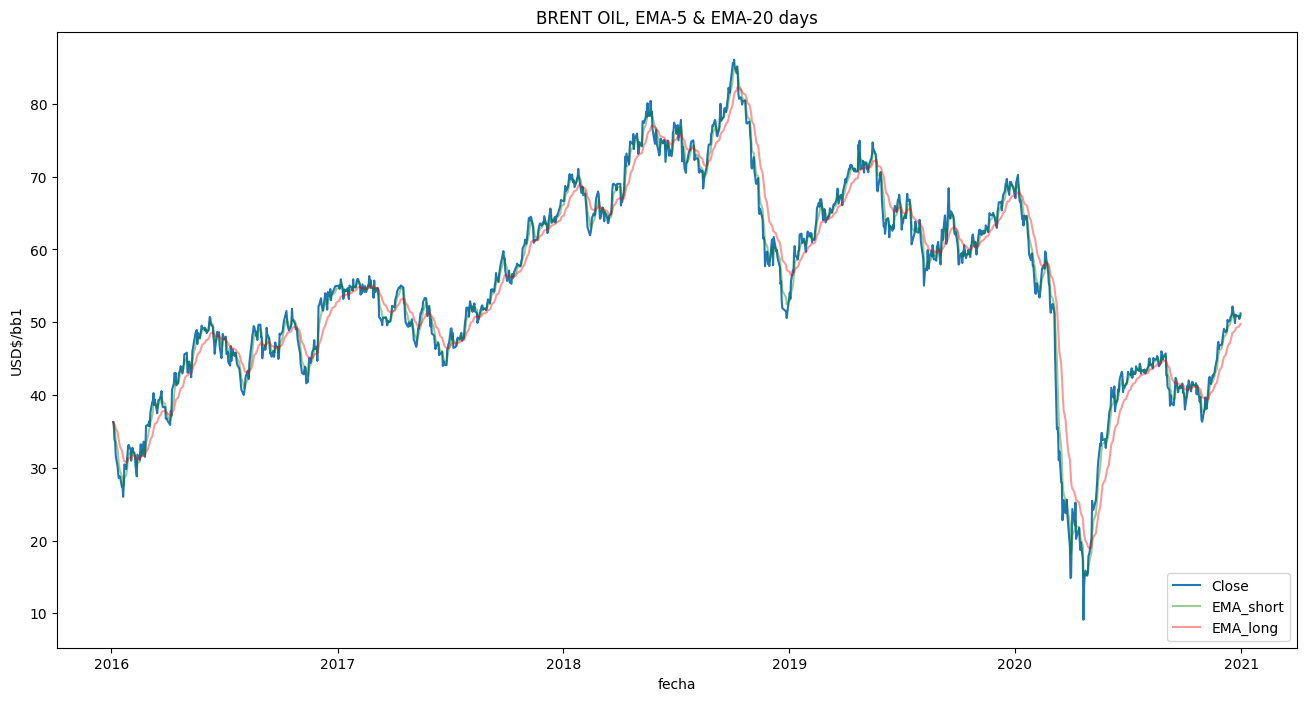

In [ ]:
#grafico de la serie de precios y sus medias moviles exponenciales
plt.figure(figsize=(16,8))
plt.title('BRENT OIL, EMA-5 & EMA-20 days')
plt.plot(df['Close'])
plt.plot(df['EMA_short'], color='green',alpha=0.4)
plt.plot(df['EMA_long'], color='red',alpha=0.4)
plt.xlabel('fecha')
plt.ylabel('USD$/bb1')
plt.legend(['Close','EMA_short','EMA_long'],loc ='lower right')
plt.show()

In [ ]:
# numero de datos

N = len(df)

#lista de señales
#-1 vender
#0 mantener
#1 comprar
signals =[0]

for i in range(1, N):
  short = df['EMA_short'][i]
  long = df['EMA_long'][i]

  p_short = df['EMA_short'][i-1]
  p_long = df['EMA_long'][i-1]

  if p_short < p_long and short >= long:
      signals.append(1)

  elif p_short > p_long and short <= long:
      signals.append(-1)

  else:
    signals.append(0)



df['Signals'] = signals
df

,Close,EMA_short,EMA_long,Signals
DATE,,,,
2016-01-04,36.28,36.280000,36.280000,0
2016-01-05,35.56,36.040000,36.211429,0
2016-01-06,33.89,35.323333,35.990340,0
2016-01-07,33.57,34.738889,35.759832,0
2016-01-08,31.67,33.715926,35.370324,0
...,...,...,...,...
2020-12-24,50.88,50.792761,49.228966,0
2020-12-28,50.88,50.821840,49.386208,0
2020-12-29,50.44,50.694560,49.486569,0


In [ ]:
df['Buy'] = np.where(df['Signals']==1, df['Close'], np.nan)
df['Sell'] = np.where(df['Signals']==-1, df['Close'], np.nan)
df


,Close,EMA_short,EMA_long,Signals,Buy,Sell
DATE,,,,,,
2016-01-04,36.28,36.280000,36.280000,0,NaN,NaN
2016-01-05,35.56,36.040000,36.211429,0,NaN,NaN
2016-01-06,33.89,35.323333,35.990340,0,NaN,NaN
2016-01-07,33.57,34.738889,35.759832,0,NaN,NaN
2016-01-08,31.67,33.715926,35.370324,0,NaN,NaN
...,...,...,...,...,...,...
2020-12-24,50.88,50.792761,49.228966,0,NaN,NaN
2020-12-28,50.88,50.821840,49.386208,0,NaN,NaN
2020-12-29,50.44,50.694560,49.486569,0,NaN,NaN


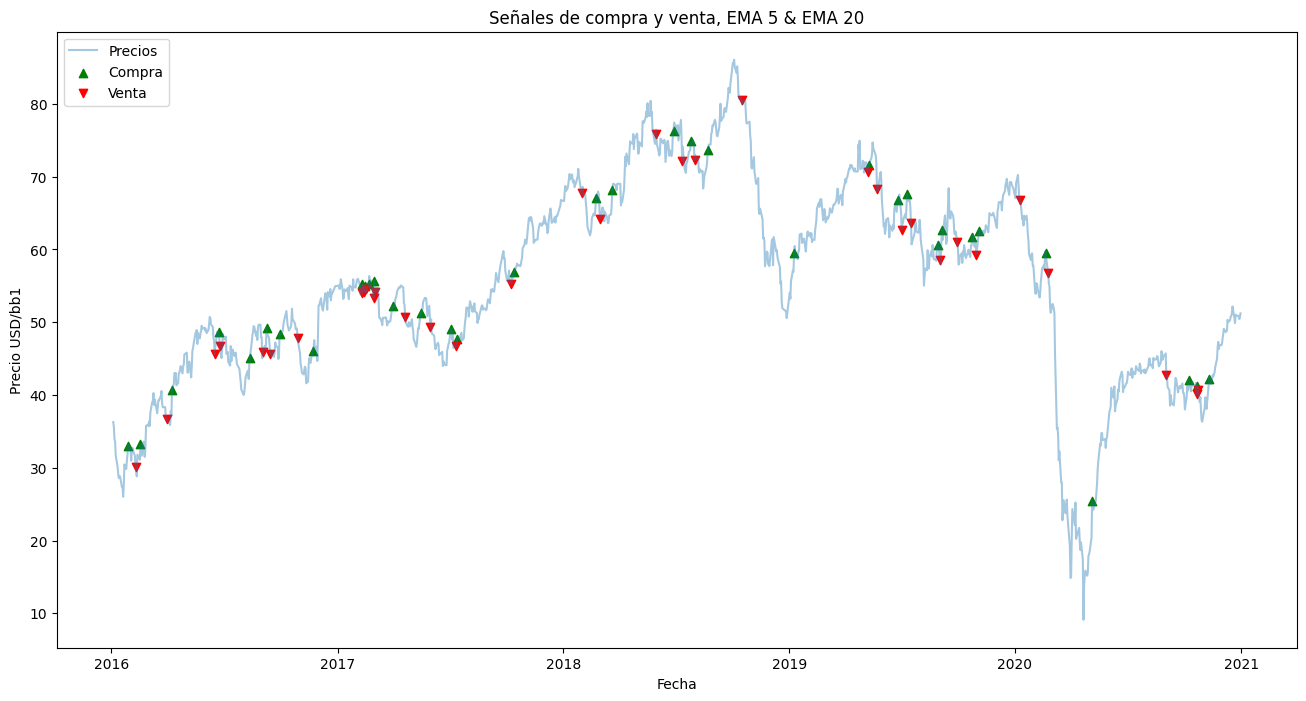

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],alpha = 0.4, label ='Precios')

plt.scatter(df.index,df['Buy'], color = 'green', marker='^',label = 'Compra')
plt.scatter(df.index,df['Sell'], color = 'red', marker='v',label = 'Venta')

plt.title('Señales de compra y venta, EMA 5 & EMA 20')
plt.xlabel('Fecha')
plt.ylabel('Precio USD/bb1')
plt.legend(loc='upper left')

plt.show()


In [ ]:
from IPython.terminal.magics import SList
#Backtesting
N = len(df)
equity = [100]

TP = 0.03
SL= 0.01

pos = 0
price = 0

for i in range (1,N):

  equity.append(equity[i-1])

  if pos == 1 :

    if df['Close'][i] >= price*(1+TP):
      pos = 0
      equity[i] *= (1+TP)

    elif df['Close'][i] <= price*(1-SL):
        pos = 0
        equity[i] *= (1-SL)

  elif pos == -1 :

    if df['Close'][i] <= price*(1-TP):
      pos = 0
      equity[i] *= (1+TP)

    elif df['Close'][i] >=price*(1+SL):
        pos = 0
        equity[i] *= (1-SL)


  else:

     if df['Signals'][i] != 0:
       pos = df['Signals'][i]
       price = df['Close'][i]

df['Equity'] = equity







In [ ]:
df

,Close,EMA_short,EMA_long,Signals,Buy,Sell,Equity
DATE,,,,,,,
2016-01-04,36.28,36.280000,36.280000,0,NaN,NaN,100.000000
2016-01-05,35.56,36.040000,36.211429,0,NaN,NaN,100.000000
2016-01-06,33.89,35.323333,35.990340,0,NaN,NaN,100.000000
2016-01-07,33.57,34.738889,35.759832,0,NaN,NaN,100.000000
2016-01-08,31.67,33.715926,35.370324,0,NaN,NaN,100.000000
...,...,...,...,...,...,...,...
2020-12-24,50.88,50.792761,49.228966,0,NaN,NaN,122.044183
2020-12-28,50.88,50.821840,49.386208,0,NaN,NaN,122.044183
2020-12-29,50.44,50.694560,49.486569,0,NaN,NaN,122.044183


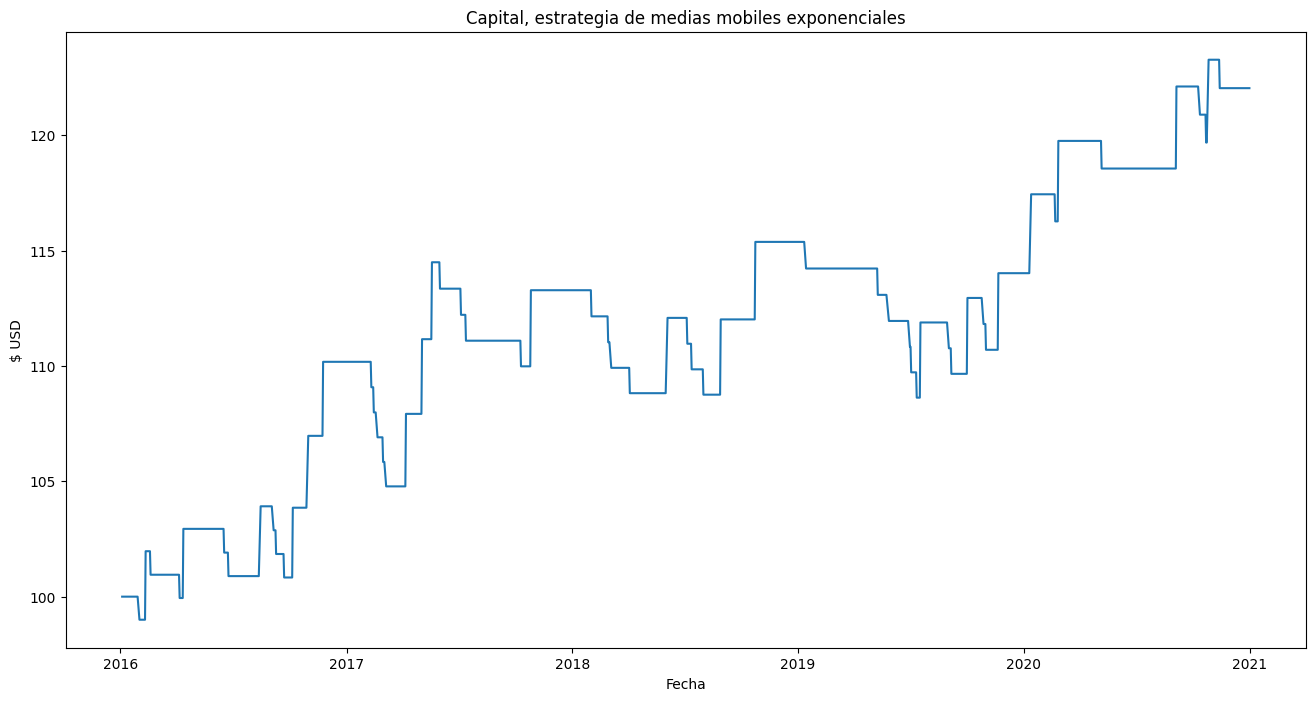

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Equity'])

plt.title('Capital, estrategia de medias mobiles exponenciales')
plt.xlabel('Fecha')
plt.ylabel('$ USD')

plt.show()


In [ ]:
ret = np.log(df['Equity']).diff().mean()
ret *=252

vol = np.log(df['Equity']).diff().std()
vol *= np.sqrt(252)

rf = 0.01

sharpe_ratio = (ret-rf)/vol
sharpe_ratio

0.4519606496376969

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yfin


In [ ]:
df2 = yfin.download('^GSPC',start = '2016-01-01', end= '2021-01-01')
df2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000


In [ ]:
df2['Equity'] = (100/df2['Close'][0])*df2['Close']
df2

,Open,High,Low,Close,Adj Close,Volume,Equity
Date,,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000,100.000000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000,100.201223
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000,98.887044
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000,96.543377
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000,95.497004
...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000,183.988354
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000,185.593197
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000,185.179811


<function matplotlib.pyplot.show(close=None, block=None)>

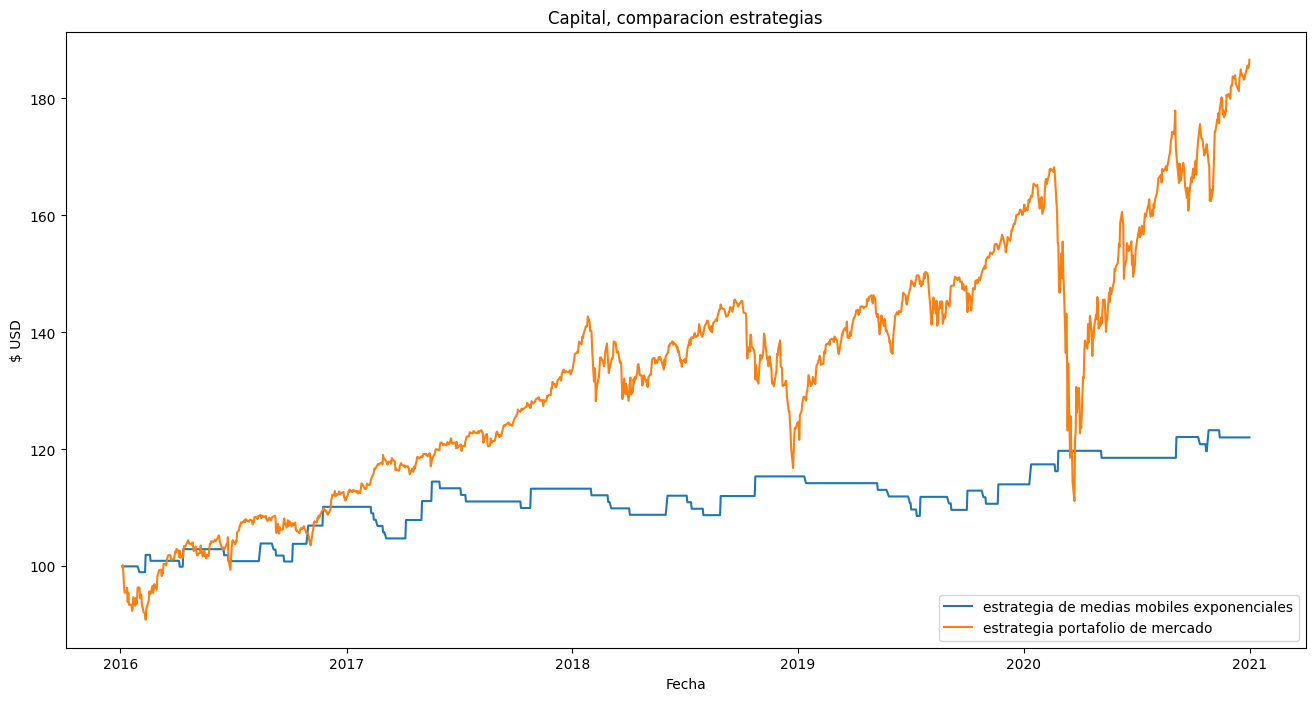

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Equity'], label='estrategia de medias mobiles exponenciales')
plt.plot(df2['Equity'], label='estrategia portafolio de mercado')
plt.title('Capital, comparacion estrategias')
plt.xlabel('Fecha')
plt.ylabel('$ USD')
plt.legend(loc='lower right')

plt.show


In [ ]:
ret = np.log(df2['Equity']).diff().mean()
ret *=252

vol = np.log(df2['Equity']).diff().std()
vol *= np.sqrt(252)

rf = 0.01

sharpe_ratio = (ret-rf)/vol
sharpe_ratio

0.59481054922144